## fully connected neural network

### generate data from function

In [257]:
import numpy as np

# function: y = x1^3 + 5*x1^2 - 0.1*x1^6 + 45*sin(5*x1) + 6

def f(x: np.ndarray) -> np.ndarray:
    """
    Function to compute the value of the polynomial y = x1^3 + 5*x1^2 - 0.1*x1^6 + 45*sin(5*x1) + 6.
    """
    return x**3 + 5*x**2 - 0.1*x**6 + 45*np.sin(5*x) + 6

# test the function
print(f"{f(np.array([3]))=}")

f(np.array([3]))=array([34.36295281])


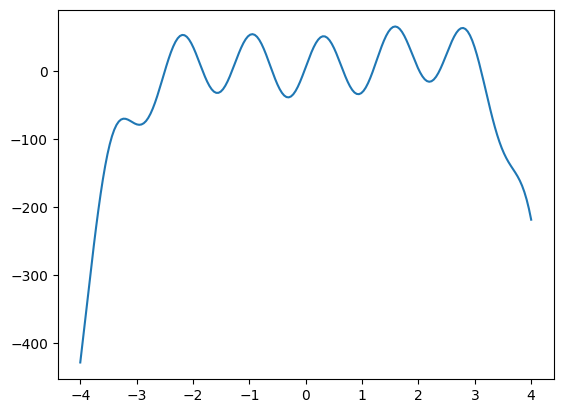

In [258]:
# plot the function
import matplotlib.pyplot as plt

X1 = np.linspace(-4, 4, 200)
Y = f(X1)
plt.plot(X1, Y)

In [259]:
def f_plus_error(x: np.ndarray, err_scale: float) -> np.ndarray:
    """
    Function to compute the value of the polynomial y = x1^3 + 5*x1^2 - 0.1*x1^6 + 45*sin(5*x1) + 6
    with a small error added.
    """
    return f(x) + np.random.normal(0, err_scale, size=x.shape)

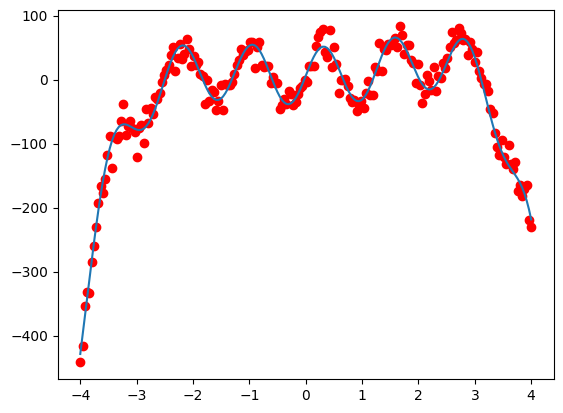

In [260]:
# plot the function plus data points with error
X1 = np.linspace(-4, 4, 200)
Y = f(X1)
Yerr = f_plus_error(X1, 15)

plt.plot(X1, Y)
plt.scatter(X1, Yerr, color='red')

## build the neural network
<img src="neuralnetwork.png" alt="neuralnetwork" width="300"/>

<img src="hidden_layer_math.png" alt="neuralnetwork" width="400"/>

In [270]:
def generate_neural_network_weights(input_size: int, hidden_size: int, output_size: int) -> tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    """Generate a simple neural network with random weights."""
    weights_input_hidden = np.random.rand(hidden_size, input_size)
    weights_hidden_output = np.random.rand(output_size, hidden_size)
    # biases
    biases_hidden = np.random.rand(hidden_size)
    biases_output = np.random.rand(output_size)
    return weights_input_hidden, weights_hidden_output, biases_hidden, biases_output

# test the neural network weights generation
input_size = 1
hidden_size = 5
output_size = 1
weights_input_hidden, weights_hidden_output, biases_hidden, biases_output = generate_neural_network_weights(input_size, hidden_size, output_size)
print(f"{weights_input_hidden=}")
print(f"{weights_hidden_output=}")
print(f"{biases_hidden=}")
print(f"{biases_output=}")

weights_input_hidden=array([[0.17404793],
       [0.16279894],
       [0.04868492],
       [0.25793595],
       [0.13369332]])
weights_hidden_output=array([[0.85444489, 0.90174123, 0.88987368, 0.70775922, 0.28995243]])
biases_hidden=array([0.88535229, 0.42526369, 0.28050787, 0.59898133, 0.27005231])
biases_output=array([0.17433036])


In [271]:
def sigmoid_function(x: np.ndarray) -> np.ndarray:
    """Apply the sigmoid activation function."""
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x: np.ndarray) -> np.ndarray:
    """Compute the derivative of the sigmoid function."""
    sig = sigmoid_function(x)
    return sig * (1 - sig)

# test the sigmoid function and its derivative
x = np.array([0, 1, 2])
print("Sigmoid Function:")
print(sigmoid_function(x))
print("Sigmoid Derivative:")
print(sigmoid_derivative(x))

Sigmoid Function:
[0.5        0.73105858 0.88079708]
Sigmoid Derivative:
[0.25       0.19661193 0.10499359]


In [272]:
# let's test the neural network with a simple forward pass
def forward_pass(input_data: np.ndarray, weights_input_hidden: np.ndarray, weights_hidden_output: np.ndarray, biases_hidden: np.ndarray, biases_output: np.ndarray) -> np.ndarray:
    """Perform a forward pass through the neural network."""
    z = weights_input_hidden @ input_data + biases_hidden
    a = sigmoid_function(z)
    output = weights_hidden_output @ a + biases_output
    return z, a, output

# test the forward pass
input_data = np.array([3])
z, a, output = forward_pass(input_data, weights_input_hidden, weights_hidden_output, biases_hidden, biases_output)
print(f"{z=}")
print(f"{a=}")
print("Forward Pass Output:")
print(output)

z=array([1.40749608, 0.91366053, 0.42656263, 1.37278918, 0.67113226])
a=array([0.80337071, 0.71374864, 0.60505256, 0.79783041, 0.66175664])
Forward Pass Output:
[2.79935306]


In [273]:
def loss_function(predicted: np.ndarray, actual: np.ndarray) -> float:
    """Compute the mean squared error loss."""
    return np.mean(((predicted - actual) ** 2)/2)

# test the loss function
predicted = np.array(2)
actual = np.array(3)
print("Loss Function:")
print(loss_function(predicted, actual))

Loss Function:
0.5


In [276]:
def backpropagation(
        input_data: np.ndarray,
        weights_input_hidden: np.ndarray,
        weights_hidden_output: np.ndarray,
        biases_hidden: np.ndarray,
        biases_output: np.ndarray,
        actual_output: np.ndarray
) -> tuple[np.ndarray, np.ndarray]:
    """Perform backpropagation to compute gradients."""
    # Forward pass
    z, a, predicted_output = forward_pass(input_data, weights_input_hidden, weights_hidden_output, biases_hidden, biases_output)

    # Compute loss
    loss = loss_function(predicted_output, actual_output)

    # Backward pass
    d_predicted_output = predicted_output - actual_output
    d_weights_hidden_output = np.outer(d_predicted_output, a)
    d_biases_output = d_predicted_output

    d_a = weights_hidden_output.T @ d_predicted_output
    d_z = d_a * sigmoid_derivative(z)
    d_weights_input_hidden = np.outer(d_z, input_data)
    d_biases_hidden = d_z

    return (d_weights_input_hidden, d_weights_hidden_output, d_biases_hidden, d_biases_output), loss

# test the backpropagation
input_data = np.array([1])
actual_output = np.array([2])
(d_weights, loss) = backpropagation(input_data, weights_input_hidden, weights_hidden_output, biases_hidden, biases_output, actual_output)
print("Backpropagation Loss:")
print(loss)
print("Backpropagation Weights Gradients:")
print(d_weights[0])
print(d_weights[1])
print("Backpropagation Biases Gradients:")
print(d_weights[2])
print(d_weights[3])


Backpropagation Loss:
0.16634696055138978
Backpropagation Weights Gradients:
[[0.0942099 ]
 [0.11940611]
 [0.12490438]
 [0.08539801]
 [0.04015221]]
[[0.428315   0.37083414 0.33544334 0.40492031 0.34583968]]
Backpropagation Biases Gradients:
[0.0942099  0.11940611 0.12490438 0.08539801 0.04015221]
[0.57679626]


In [277]:
def update_weights(
        weights_input_hidden: np.ndarray,
        weights_hidden_output: np.ndarray,
        biases_hidden: np.ndarray,
        biases_output: np.ndarray,
        gradients: tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray],
        learning_rate: float
) -> tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    """Update the weights and biases using the computed gradients."""
    d_weights_input_hidden, d_weights_hidden_output, d_biases_hidden, d_biases_output = gradients

    weights_input_hidden -= learning_rate * d_weights_input_hidden
    weights_hidden_output -= learning_rate * d_weights_hidden_output
    biases_hidden -= learning_rate * d_biases_hidden
    biases_output -= learning_rate * d_biases_output

    return (weights_input_hidden, weights_hidden_output, biases_hidden, biases_output)

In [278]:
def train_neural_network(
    input_data: np.ndarray,
    actual_output: np.ndarray,
    weights_input_hidden: np.ndarray,
    weights_hidden_output: np.ndarray,
    biases_hidden: np.ndarray,
    biases_output: np.ndarray,
    learning_rate: float,
    epochs: int
) -> tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    """Train the neural network using backpropagation example by example."""
    
    num_examples = input_data.shape[0]
    
    for epoch in range(epochs):
        total_loss = 0
    
        # Process each example individually
        for i in range(num_examples):
            # Get single example
            x = input_data[i]
            y = actual_output[i]
            
            # Forward and backward pass for this example
            gradients, loss = backpropagation(x, weights_input_hidden, weights_hidden_output, biases_hidden, biases_output, y)
            total_loss += loss
            
            # Update weights for this example
            weights_input_hidden, weights_hidden_output, biases_hidden, biases_output = update_weights(
            weights_input_hidden, weights_hidden_output, biases_hidden, biases_output, gradients, learning_rate
            )
    
        # Print loss every 10 epochs
        if epoch % 10 == 0:
            avg_loss = total_loss / num_examples
            print(f"Epoch {epoch}, Average Loss: {avg_loss}")
    
    return (weights_input_hidden, weights_hidden_output, biases_hidden, biases_output)

In [279]:
input_data = np.linspace(-2, 2, 1000).reshape(-1, 1)
actual_output = f_plus_error(input_data, 15)
number_of_hidden_neurons = 5
weights_input_hidden, weights_hidden_output, biases_hidden, biases_output = generate_neural_network_weights(input_size, number_of_hidden_neurons, output_size)
learning_rate = 0.0001
epochs = 1000
weights_input_hidden, weights_hidden_output, biases_hidden, biases_output = train_neural_network(
    input_data,
    actual_output,
    weights_input_hidden,
    weights_hidden_output,
    biases_hidden,
    biases_output,
    learning_rate,
    epochs
)

Epoch 0, Average Loss: 656.685519101299
Epoch 10, Average Loss: 599.112907701386
Epoch 20, Average Loss: 591.7859820229985
Epoch 30, Average Loss: 584.4999513586923
Epoch 40, Average Loss: 577.4476900910355
Epoch 50, Average Loss: 570.4370679286812
Epoch 60, Average Loss: 563.420392634115
Epoch 70, Average Loss: 556.4949759088332
Epoch 80, Average Loss: 549.7329331997406
Epoch 90, Average Loss: 543.5228794891619
Epoch 100, Average Loss: 538.1077032534192
Epoch 110, Average Loss: 533.5051043277367
Epoch 120, Average Loss: 529.7767070090382
Epoch 130, Average Loss: 526.7997188484542
Epoch 140, Average Loss: 524.394723840067
Epoch 150, Average Loss: 522.4110456908246
Epoch 160, Average Loss: 520.7372986211082
Epoch 170, Average Loss: 519.290895923114
Epoch 180, Average Loss: 518.003002115114
Epoch 190, Average Loss: 516.7870418225285
Epoch 200, Average Loss: 515.3559827893171
Epoch 210, Average Loss: 513.17082322646
Epoch 220, Average Loss: 511.0067189768599
Epoch 230, Average Loss: 508.4

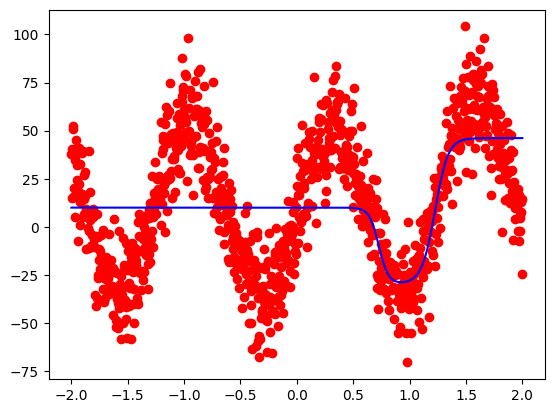

In [280]:
# test the trained neural network

output = [forward_pass(x, weights_input_hidden, weights_hidden_output, biases_hidden, biases_output)[2] for x in input_data]

plt.plot(input_data, actual_output, 'ro', label='Data with noise')
plt.plot(input_data, output, 'b-', label='Neural Network Prediction')